Video Games Dataset Analysis - Class Activity
Dataset Overview
Source: Video Games Sales Dataset
Dataset: vgsales.csv
Columns: Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
Sales units: Millions of copies sold

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
df = pd.read_csv('vgsales.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (16598, 11)

First few rows:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Data types:
Rank              int64
Name             object
Platform         object
Year            float64
Genre       

## 1. Top 5 Games by Global Sales
Question: Which 5 games have the highest global sales? What do they have in common?

In [4]:
# Question 1: Which 5 games have the highest global sales? What do they have in common?
top_5_games = df.nlargest(5, 'Global_Sales')[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]
print("Top 5 Games by Global Sales:")
print(top_5_games)

# Analyze common patterns
print("\nCommon patterns in top 5 games:")
print("Platforms:", top_5_games['Platform'].value_counts())
print("Genres:", top_5_games['Genre'].value_counts())
print("Publishers:", top_5_games['Publisher'].value_counts())
print("Years:", top_5_games['Year'].value_counts())

Top 5 Games by Global Sales:
                       Name Platform    Year         Genre Publisher  \
0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  

Common patterns in top 5 games:
Platforms: Wii    3
NES    1
GB     1
Name: Platform, dtype: int64
Genres: Sports          2
Platform        1
Racing          1
Role-Playing    1
Name: Genre, dtype: int64
Publishers: Nintendo    5
Name: Publisher, dtype: int64
Years: 2006.0    1
1985.0    1
2008.0    1
2009.0    1
1996.0    1
Name: Year, dtype: int64


## 2. Total Sales by Genre

Total Sales by Genre:
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

Genre with highest total sales: Action with 1751.18 million copies


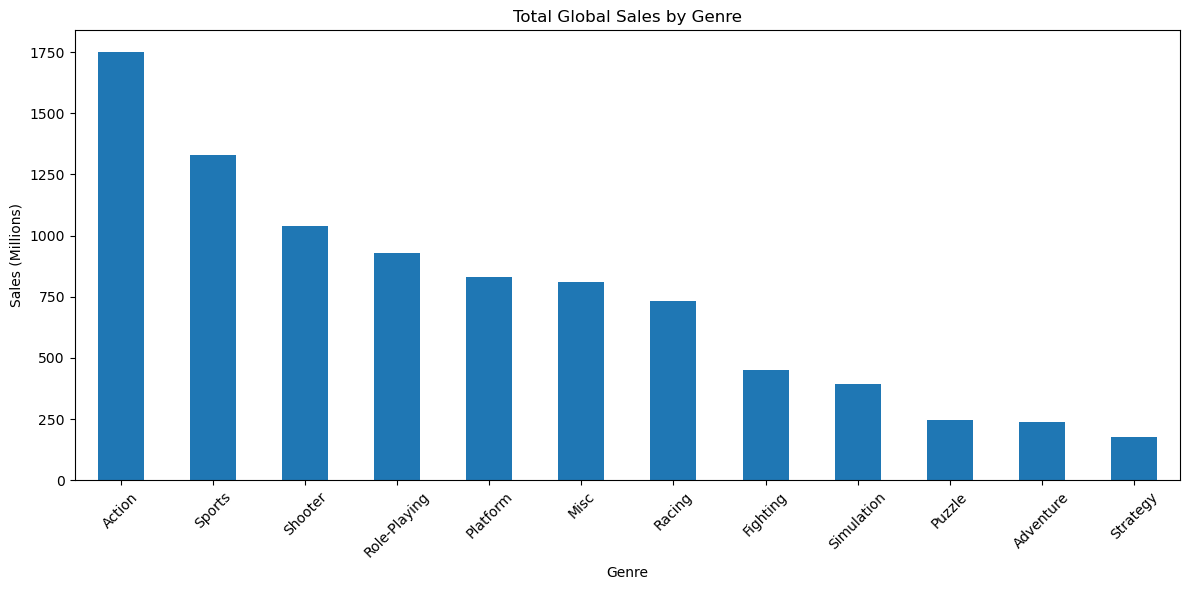

In [5]:
# Question 2: Calculate total sales by genre. Which genre generates the most revenue globally?
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print("Total Sales by Genre:")
print(genre_sales)

# Find the top genre
top_genre = genre_sales.index[0]
print(f"\nGenre with highest total sales: {top_genre} with {genre_sales.iloc[0]:.2f} million copies")

# Visualize
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Average Sales per Platform

In [6]:
# Question 3: Find the average sales per game for each platform
platform_stats = df.groupby('Platform').agg({
    'Global_Sales': ['count', 'mean', 'sum']
}).round(2)

platform_stats.columns = ['Game_Count', 'Avg_Sales_Per_Game', 'Total_Sales']
platform_stats = platform_stats.sort_values('Avg_Sales_Per_Game', ascending=False)

print("Platform Performance:")
print(platform_stats.head(10))

# Top platforms by average sales
top_platforms = platform_stats.head(5)
print(f"\nTop 5 platforms by average sales per game:")
print(top_platforms[['Game_Count', 'Avg_Sales_Per_Game']])

Platform Performance:
          Game_Count  Avg_Sales_Per_Game  Total_Sales
Platform                                             
GB                98                2.61       255.45
NES               98                2.56       251.07
GEN               27                1.05        28.36
SNES             239                0.84       200.05
PS4              336                0.83       278.10
X360            1265                0.77       979.96
2600             133                0.73        97.08
PS3             1329                0.72       957.84
Wii             1325                0.70       926.71
N64              319                0.69       218.88

Top 5 platforms by average sales per game:
          Game_Count  Avg_Sales_Per_Game
Platform                                
GB                98                2.61
NES               98                2.56
GEN               27                1.05
SNES             239                0.84
PS4              336                0.83

## 4. Publisher Analysis

In [7]:
# Question 4: Which publisher has released the most games? Do they also have the highest total sales?
publisher_stats = df.groupby('Publisher').agg({
    'Name': 'count',
    'Global_Sales': 'sum'
}).rename(columns={'Name': 'Game_Count'})

# Most games released
most_games = publisher_stats.sort_values('Game_Count', ascending=False).head(10)
print("Top 10 Publishers by Number of Games Released:")
print(most_games)

# Highest total sales
highest_sales = publisher_stats.sort_values('Global_Sales', ascending=False).head(10)
print("\nTop 10 Publishers by Total Sales:")
print(highest_sales)

# Compare top publishers
print(f"\nPublisher with most games: {most_games.index[0]} ({most_games.iloc[0]['Game_Count']} games)")
print(f"Publisher with highest sales: {highest_sales.index[0]} ({highest_sales.iloc[0]['Global_Sales']:.2f} million copies)")

# Check if they're the same
if most_games.index[0] == highest_sales.index[0]:
    print("Same publisher leads in both categories!")
else:
    print("Different publishers lead in game count vs. total sales")

Top 10 Publishers by Number of Games Released:
                              Game_Count  Global_Sales
Publisher                                             
Electronic Arts                     1351       1110.32
Activision                           975        727.46
Namco Bandai Games                   932        254.09
Ubisoft                              921        474.72
Konami Digital Entertainment         832        283.64
THQ                                  715        340.77
Nintendo                             703       1786.56
Sony Computer Entertainment          683        607.50
Sega                                 639        272.99
Take-Two Interactive                 413        399.54

Top 10 Publishers by Total Sales:
                              Game_Count  Global_Sales
Publisher                                             
Nintendo                             703       1786.56
Electronic Arts                     1351       1110.32
Activision                           9

## 5. Post-2010 Genre Dominance by Region

In [8]:
# Question 5: For games released after 2010, which genre dominated each region?
recent_games = df[df['Year'] > 2010]

# North America
na_genre = recent_games.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
print("Post-2010 Genre Dominance - North America:")
print(na_genre.head(5))

# Europe
eu_genre = recent_games.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
print("\nPost-2010 Genre Dominance - Europe:")
print(eu_genre.head(5))

# Japan
jp_genre = recent_games.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
print("\nPost-2010 Genre Dominance - Japan:")
print(jp_genre.head(5))

# Summary
print(f"\nSummary of Post-2010 Dominant Genres:")
print(f"North America: {na_genre.index[0]} ({na_genre.iloc[0]:.2f} million)")
print(f"Europe: {eu_genre.index[0]} ({eu_genre.iloc[0]:.2f} million)")
print(f"Japan: {jp_genre.index[0]} ({jp_genre.iloc[0]:.2f} million)")

Post-2010 Genre Dominance - North America:
Genre
Action          227.46
Shooter         184.53
Sports          105.88
Role-Playing     79.02
Misc             70.29
Name: NA_Sales, dtype: float64

Post-2010 Genre Dominance - Europe:
Genre
Action          200.52
Shooter         142.54
Sports           86.60
Role-Playing     60.06
Racing           41.00
Name: EU_Sales, dtype: float64

Post-2010 Genre Dominance - Japan:
Genre
Role-Playing    76.77
Action          62.15
Misc            17.25
Fighting        12.24
Platform        12.07
Name: JP_Sales, dtype: float64

Summary of Post-2010 Dominant Genres:
North America: Action (227.46 million)
Europe: Action (200.52 million)
Japan: Role-Playing (76.77 million)


## 6. Regional Sales Contribution

Regional Sales Contribution:
          Region  Total_Sales  Percentage
0  North America      4392.95       49.25
1         Europe      2434.13       27.29
2          Japan      1291.02       14.47
3          Other       797.75        8.94
4         Global      8920.44      100.00

Most important region: North America (49.25%)


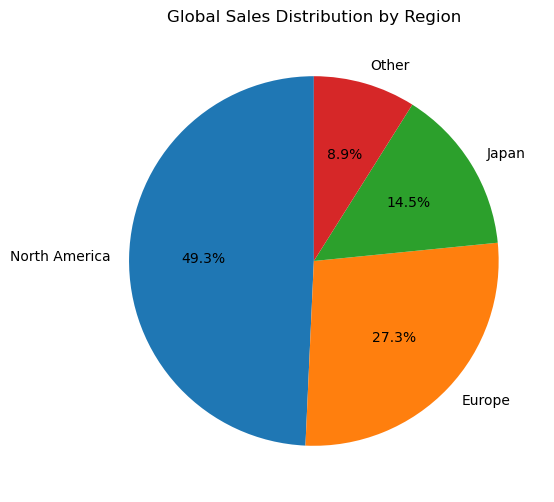

In [9]:
# Question 6: Calculate the percentage of global sales that each region contributes
total_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

regional_contribution = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Other', 'Global'],
    'Total_Sales': [total_sales['NA_Sales'], total_sales['EU_Sales'], 
                   total_sales['JP_Sales'], total_sales['Other_Sales'], total_sales['Global_Sales']]
})

regional_contribution['Percentage'] = (regional_contribution['Total_Sales'] / total_sales['Global_Sales'] * 100).round(2)

print("Regional Sales Contribution:")
print(regional_contribution)

# Find most important region
most_important = regional_contribution.loc[regional_contribution['Region'] != 'Global', 'Percentage'].idxmax()
print(f"\nMost important region: {regional_contribution.loc[most_important, 'Region']} ({regional_contribution.loc[most_important, 'Percentage']}%)")

# Visualize
plt.figure(figsize=(10, 6))
regions = regional_contribution[regional_contribution['Region'] != 'Global']
plt.pie(regions['Percentage'], labels=regions['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Sales Distribution by Region')
plt.show()

## 7. Japanese vs North American Sales

In [10]:
# Question 7: Find games where Japanese sales exceed North American sales
jp_beats_na = df[df['JP_Sales'] > df['NA_Sales']].copy()
jp_beats_na['Sales_Difference'] = jp_beats_na['JP_Sales'] - jp_beats_na['NA_Sales']
jp_beats_na = jp_beats_na.sort_values('Sales_Difference', ascending=False)

print(f"Games where Japanese sales exceed North American sales: {len(jp_beats_na)}")
print("\nTop 10 games with largest JP > NA difference:")
print(jp_beats_na[['Name', 'Genre', 'Publisher', 'NA_Sales', 'JP_Sales', 'Sales_Difference']].head(10))

# Analyze patterns
print("\nPatterns in games where JP > NA:")
print("Top Genres:")
print(jp_beats_na['Genre'].value_counts().head())
print("\nTop Publishers:")
print(jp_beats_na['Publisher'].value_counts().head())
print("\nTop Platforms:")
print(jp_beats_na['Platform'].value_counts().head())

Games where Japanese sales exceed North American sales: 4125

Top 10 games with largest JP > NA difference:
                                               Name         Genre  \
214                        Monster Hunter Freedom 3  Role-Playing   
242              Dragon Quest VII: Warriors of Eden  Role-Playing   
149  Dragon Quest IX: Sentinels of the Starry Skies  Role-Playing   
338                               Friend Collection          Misc   
312                              Dragon Warrior III  Role-Playing   
161                    Monster Hunter Freedom Unite  Role-Playing   
383                                Monster Hunter 4  Role-Playing   
426            Dragon Quest VI: Maboroshi no Daichi  Role-Playing   
419                       Yokai Watch 2 Ganso/Honke  Role-Playing   
180   Dragon Quest VIII: Journey of the Cursed King  Role-Playing   

            Publisher  NA_Sales  JP_Sales  Sales_Difference  
214            Capcom      0.00      4.87              4.87  
242  Eni

## 8. Stretch Goal: Genre-Region Heatmap

Genre-Region Heatmap Data (Normalized %):
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action           19.98     21.57     12.39        23.49
Adventure         2.41      2.63      4.03         2.11
Fighting          5.09      4.16      6.77         4.60
Misc              9.34      8.87      8.35         9.44
Platform         10.18      8.28     10.13         6.47
Puzzle            2.82      2.09      4.44         1.57
Racing            8.18      9.79      4.39         9.69
Role-Playing      7.45      7.73     27.29         7.47
Shooter          13.26     12.87      2.97        12.87
Simulation        4.17      4.66      4.93         3.95
Sports           15.56     15.48     10.49        16.92
Strategy          1.56      1.86      3.83         1.42


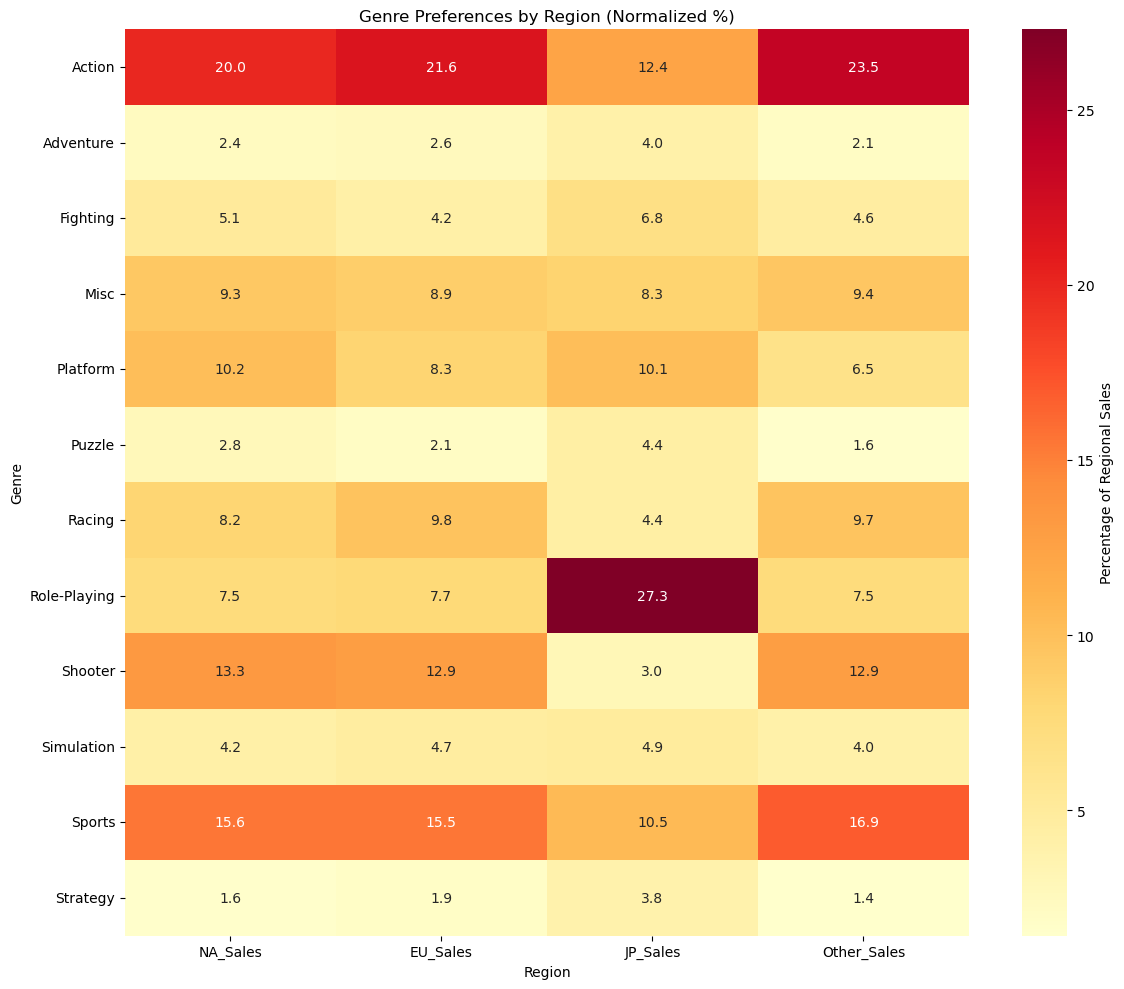


Most preferred genre in each region:
NA_Sales: Action (20.0%)
EU_Sales: Action (21.6%)
JP_Sales: Role-Playing (27.3%)
Other_Sales: Action (23.5%)
=== COMPREHENSIVE DATASET ANALYSIS ===
Total games: 16598
Date range: 1980.0 - 2020.0
Total global sales: 8920.44 million copies
Average sales per game: 0.54 million copies

Top 5 Publishers by total sales:
Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

Top 5 Platforms by total sales:
Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64


In [11]:
# Stretch Goal: Genre-Region Heatmap
# Calculate total sales by genre for each region
genre_region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Normalize by region (each region sums to 100%)
genre_region_pct = genre_region_sales.div(genre_region_sales.sum(axis=0), axis=1) * 100

print("Genre-Region Heatmap Data (Normalized %):")
print(genre_region_pct.round(2))

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_region_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage of Regional Sales'})
plt.title('Genre Preferences by Region (Normalized %)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Find most preferred genre in each region
print("\nMost preferred genre in each region:")
for region in genre_region_pct.columns:
    top_genre = genre_region_pct[region].idxmax()
    top_percentage = genre_region_pct.loc[top_genre, region]
    print(f"{region}: {top_genre} ({top_percentage:.1f}%)")

    # Helper function for comprehensive analysis
def analyze_dataset(df):
    """Comprehensive analysis of the video games dataset"""
    print("=== COMPREHENSIVE DATASET ANALYSIS ===")
    print(f"Total games: {len(df)}")
    print(f"Date range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"Total global sales: {df['Global_Sales'].sum():.2f} million copies")
    print(f"Average sales per game: {df['Global_Sales'].mean():.2f} million copies")
    
    print(f"\nTop 5 Publishers by total sales:")
    top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head()
    print(top_publishers)
    
    print(f"\nTop 5 Platforms by total sales:")
    top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head()
    print(top_platforms)

# Run comprehensive analysis
analyze_dataset(df)